In [2]:
!pip install sounddevice

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install wave

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1239 sha256=0ddb5fd1650248718a41036b69af8320e1b5f74c729aea043c14edb323708dad
  Stored in directory: /root/.cache/pip/wheels/25/e8/fe/458c7dac00c6abedad6380b9d0ef1a5cbc7c21807df1d30915
Successfully built wave


In [4]:
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install sounddevice

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import sounddevice as sd
from scipy.io.wavfile import write
import wave
import numpy as np

from scipy.fftpack import fft
from scipy.io import wavfile # get the api

import matplotlib.pyplot as plt

## Youtube download

In [2]:
url=[
    "https://www.youtube.com/watch?v=fYEXdCCpfVQ",
    "https://www.youtube.com/watch?v=eUUuI--jAlM",
    "https://www.youtube.com/watch?v=OA8aw07dpg0"
    "https://www.youtube.com/watch?v=2n-xhwgrhBo",
    "https://www.youtube.com/watch?v=RhhQW_tVGco",
    "https://www.youtube.com/watch?v=saGYMhApaH8",
    "https://www.youtube.com/watch?v=9UU5WinKSiM",
    "https://www.youtube.com/watch?v=fJ9rUzIMcZQ",
    "https://www.youtube.com/watch?v=bpOSxM0rNPM"

]

In [3]:
import youtube_dl
def run(urls):
    video_url = urls
    video_info = youtube_dl.YoutubeDL().extract_info(
        url = video_url,download=False
    )
    filename = f"Canciones1/{video_info['title']}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

In [ ]:
x=[]
for i in range(len(urls)):
    x.append(run(urls[i]))

[youtube] fJ9rUzIMcZQ: Downloading webpage
[youtube] fJ9rUzIMcZQ: Downloading webpage
[download] Destination: Queen – Bohemian Rhapsody (Official Video Remastered).mp3
[download] 100% of 5.68MiB in 02:16                 
Download complete... Queen – Bohemian Rhapsody (Official Video Remastered).mp3


'Queen – Bohemian Rhapsody (Official Video Remastered).mp3'

In [4]:
run("https://www.youtube.com/watch?v=fYEXdCCpfVQ")

[youtube] fYEXdCCpfVQ: Downloading webpage
[youtube] fYEXdCCpfVQ: Downloading player 041a7965
[youtube] fYEXdCCpfVQ: Downloading webpage
[download] Destination: Canciones1\Mac Miller - Hand Me Downs.mp3
[download] 100% of 4.70MiB in 00:59                  
Download complete... Canciones1/Mac Miller - Hand Me Downs.mp3


## Transforming mp3 to wav

In [8]:
import ffmpeg


In [22]:
in_filename="Canciones1/Mac Miller - Hand Me Downs.mp3"

In [15]:
input = ffmpeg.input()

In [16]:
audio = input.audio.filter("aecho", 0.8, 0.9, 1000, 0.3)

In [17]:
out = ffmpeg.output(audio, 'out.wav')

In [23]:
out, _ = (ffmpeg
    .input(in_filename)
    .output('-', format='s16le', acodec='wav', ac=1, ar='16k')
    .overwrite_output()
    .run(capture_stdout=True)
)

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado

In [ ]:
# files                                                                         
src = "Arctic Monkeys - Do I Wanna Know# (Official Video).mp3"
dst = "test.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

In [ ]:
!pip install ffmpeg-python

## Wav file visualization

In [21]:
spf=wave.open('Mac Miller - Hand Me Downs (2).wav')
spf

NameError: ignored

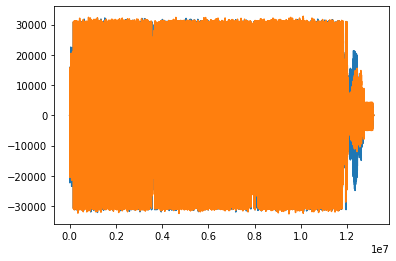

In [ ]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile # get the api
import wave

fs, data = wavfile.read('Mac Miller - Hand Me Downs (2).wav') # load the data
plt.plot(data)

In [ ]:
wav_obj = wave.open('Mac Miller - Hand Me Downs (2).wav', 'rb')

In [ ]:
sample_freq = wav_obj.getframerate()
n_samples = wav_obj.getnframes()
t_audio = n_samples/sample_freq
n_channels = wav_obj.getnchannels()
signal_wave = wav_obj.readframes(n_samples)
signal_array = np.frombuffer(signal_wave, dtype=np.int16)
l_channel = signal_array[0::2]
r_channel = signal_array[1::2]

In [ ]:
times = np.linspace(0, n_samples/sample_freq, num=n_samples)

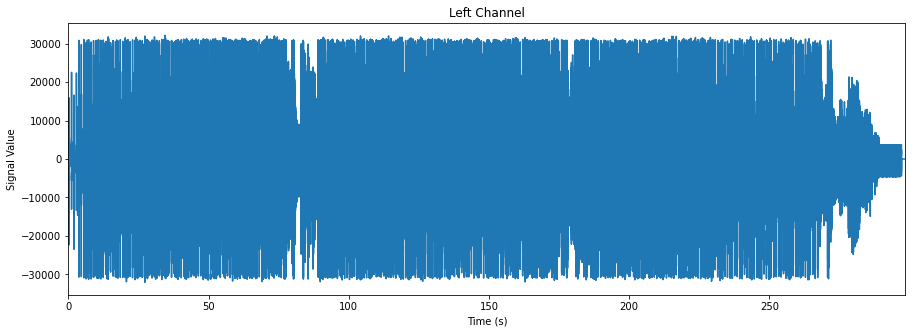

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(times, l_channel)
plt.title('Left Channel')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

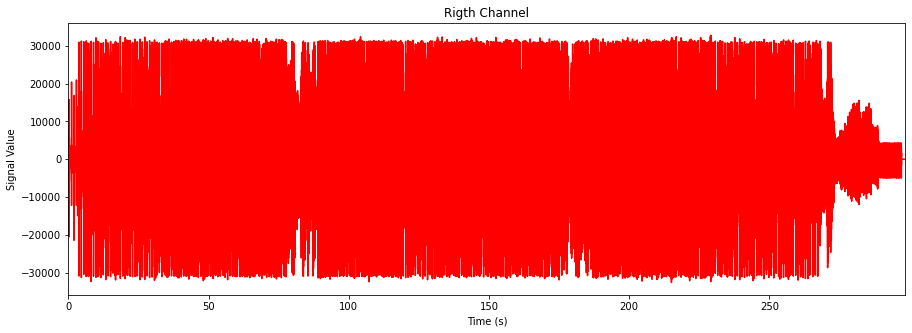

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(times, r_channel,"r")
plt.title('Rigth Channel')
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.show()

C:\Users\emili\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:7723: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


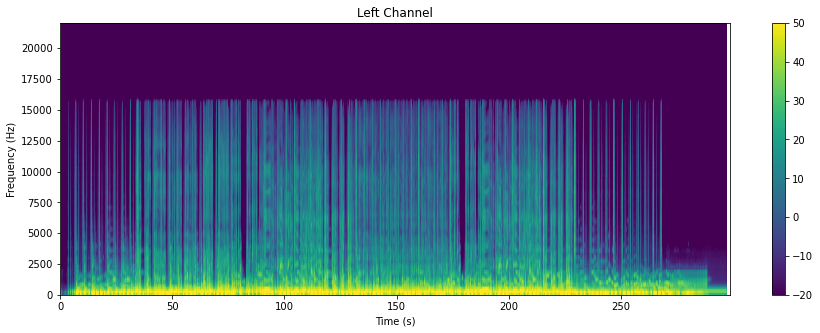

In [ ]:
plt.figure(figsize=(15, 5))
plt.specgram(l_channel, Fs=sample_freq, vmin=-20, vmax=50)
plt.title('Left Channel')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.xlim(0, t_audio)
plt.colorbar()
plt.show()

## Recording

In [16]:
fs=44100
duration = 10.5  # seconds
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=2)
sd.default.samplerate = fs
sd.default.channels = 2
myrecording = sd.rec(int(duration * fs))
sd.wait()
plt.plot(myrecording)

NameError: ignored

## FFT

### Songs

In [ ]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output
from scipy.fftpack import fft, fftshift

Data size: 13164544
Sample rate: 44100
Song length (seconds): 298.51573696145124 seconds


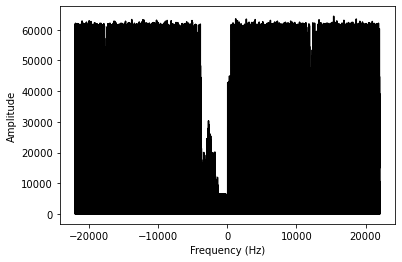

In [ ]:
# read in sound file
samplerate, data = wavfile.read('Mac Miller - Hand Me Downs (2).wav')

# define sound metadata
data_size = data.shape[0]
song_length_seconds = data_size/samplerate

# print sound metadata
print("Data size:", data_size)
print("Sample rate:", samplerate)
print("Song length (seconds):", song_length_seconds, "seconds")

# define frequency domain
freq_domain = np.linspace(-samplerate/2,samplerate/2,data_size)

# fourier transform
fourier_data = abs(fft(data))
fourier_data_shift = fftshift(fourier_data)

# plotting spectral content of sound wave

plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq_domain, fourier_data_shift,"k")
plt.show()


### Recorded audio

Data size: 463050
Sample rate: 44100
Audio length (seconds): 10.5 seconds


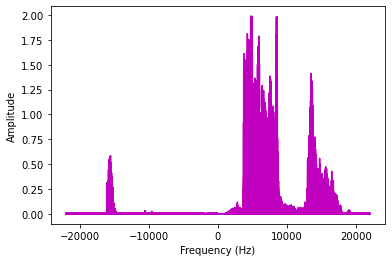

In [ ]:
# define sound metadata
data_size = myrecording.shape[0]
song_length_seconds = data_size/samplerate

# print sound metadata
print("Data size:", data_size)
print("Sample rate:", samplerate)
print("Audio length (seconds):", song_length_seconds, "seconds")

# define frequency domain
freq_domain = np.linspace(-samplerate/2,samplerate/2,data_size)

# fourier transform
fourier_myaudio = abs(fft(myrecording))
fourier_myaudio_shift = fftshift(fourier_myaudio)

# plotting spectral content of sound wave

plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.plot(freq_domain, fourier_myaudio_shift,"m")
plt.show()

## Fingerprint 